In [129]:
#Amy
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True) # this loads something called a Bunch
list(iris) # this lets us see what data elements are in the Bunch

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [130]:
#Amy
iris.data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Split data and train logistic regressor

In [131]:
#Amy
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [132]:
#Amy
# Get independent and dependent variables
X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'

In [133]:
#Amy
#Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [134]:
#Amy
#Create logistic training model
model = LogisticRegression()
#train the model
model.fit(X_train, y_train)

LogisticRegression()

In [135]:
#Amy
#make predictions on test
y_pred = model.predict(X_test)

In [136]:
#Amy
#evaluate model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        19
        True       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[19  0]
 [ 0 11]]


In [137]:
#Amy
X_train.shape #Checking how many training samples we have

(120, 1)

Play with the regularization parameter
Look at the sklearn documentation if you need help here. You should change the regularization parameter, retrain, reassess

In [138]:
#Amy
#Trying different C's to see what happens
for C_val in [0.1, 1, 10]:
    model = LogisticRegression(C=C_val)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f'C={C_val} -> Accuracy: {accuracy}')
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print('-' * 50)

C=0.1 -> Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

       False       0.90      1.00      0.95        19
        True       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.95      0.91      0.93        30
weighted avg       0.94      0.93      0.93        30

[[19  0]
 [ 2  9]]
--------------------------------------------------
C=1 -> Accuracy: 1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        19
        True       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[19  0]
 [ 0 11]]
--------------------------------------------------
C=10 -> Accuracy: 1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        19
        True    

In [139]:
# Testing what having a solver does with multiple C values and also inputting more extreme C values
for C_val in [0.01, 0.1, 0.5, 1, 10, 100.0]:
    model = LogisticRegression(C=C_val, solver="liblinear") # liblinear is better for smaller datasets like this one
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f'C={C_val} -> Accuracy: {accuracy}')
    print(classification_report(y_test, y_pred, zero_division=1))
    print(confusion_matrix(y_test, y_pred))
    print('-' * 50)

C=0.01 -> Accuracy: 0.8333333333333334
              precision    recall  f1-score   support

       False       0.79      1.00      0.88        19
        True       1.00      0.55      0.71        11

    accuracy                           0.83        30
   macro avg       0.90      0.77      0.79        30
weighted avg       0.87      0.83      0.82        30

[[19  0]
 [ 5  6]]
--------------------------------------------------
C=0.1 -> Accuracy: 1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        19
        True       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[19  0]
 [ 0 11]]
--------------------------------------------------
C=0.5 -> Accuracy: 1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        19
        True

# False positives or false negatives?
Recall is the most important metric to look at in this example because it is comparing the rate of positive to false negatives, as in the times we guessed the flower was not a deadly posion but in fact it was.


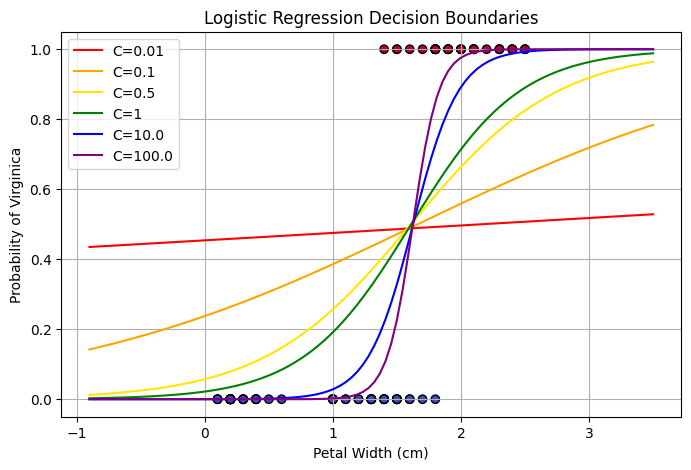

In [140]:
#Amy
import numpy as np
import matplotlib.pyplot as plt # Import matplotlib.pyplot

# Create a grid of points
x_min, x_max = X_train.min() - 1, X_train.max() + 1
x_values = np.linspace(x_min, x_max, 100).reshape(-1, 1)

plt.figure(figsize=(8, 5))

for C, color in zip([0.01, 0.1, 0.5, 1, 10.0, 100.0], ['red', 'orange', (1, 0.9, 0), 'green', 'blue', 'purple']):  #With different C values
    model = LogisticRegression(C=C, solver="liblinear")
    model.fit(X_train, y_train)

    # Predict probabilities across the grid
    y_prob = model.predict_proba(x_values)[:, 1]  # Probability of "Virginica"

    # Plot decision boundary where probability = 0.5
    plt.plot(x_values, y_prob, label=f'C={C}', color=color)

# Plot actual data
plt.scatter(X_train, y_train, c=y_train, cmap='coolwarm', edgecolors='k')
plt.xlabel("Petal Width (cm)")
plt.ylabel("Probability of Virginica")
plt.title("Logistic Regression Decision Boundaries")
plt.legend()
plt.grid(True)
plt.show()

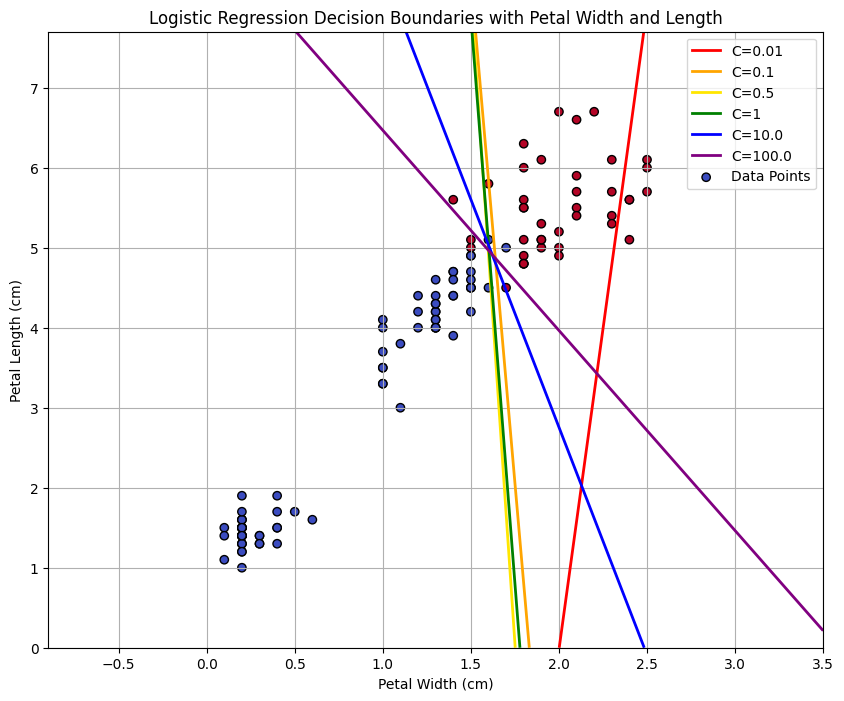

In [149]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Use both petal width and petal length as features
X = iris.data[["petal width (cm)", "petal length (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Create a grid of points for visualization
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

plt.figure(figsize=(10, 8))

# Define C values and corresponding colors
C_values = [0.01, 0.1, 0.5, 1, 10.0, 100.0]
colors = ['red', 'orange', (1, 0.9, 0), 'green', 'blue', 'purple']

# Create dummy lines for the legend
for C, color in zip(C_values, colors):
    plt.plot([], [], color=color, linewidth=2, label=f'C={C}')

# Loop through different C values and plot decision boundaries
for C, color in zip(C_values, colors):
    model = LogisticRegression(C=C, solver="liblinear")
    model.fit(X_train, y_train)

    # Predict probabilities across the grid
    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)

    # Plot decision boundary (contour line where probability = 0.5)
    plt.contour(xx, yy, Z, levels=[0.5], colors=color, linewidths=2)

# Plot actual data points as dots
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', edgecolors='k', label='Data Points')
plt.xlabel("Petal Width (cm)")
plt.ylabel("Petal Length (cm)")
plt.title("Logistic Regression Decision Boundaries with Petal Width and Length")
plt.legend()
plt.grid(True)
plt.show()

In [142]:
# Testing which C value is the best
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {"C": [0.01, 0.1, 0.5, 1.0, 10.0, 100.0]}

# Perform grid search
grid_search = GridSearchCV(LogisticRegression(solver="liblinear"), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print Best C value
print("Best C:", grid_search.best_params_)

Best C: {'C': 0.1}


In [160]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

softmax_reg = LogisticRegression(random_state=42, C=30)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=30, random_state=42)

In [161]:
softmax_reg.predict([[5, 2]])

softmax_reg.predict_proba([[5, 2]]).round(2)


array([[0.  , 0.04, 0.96]])

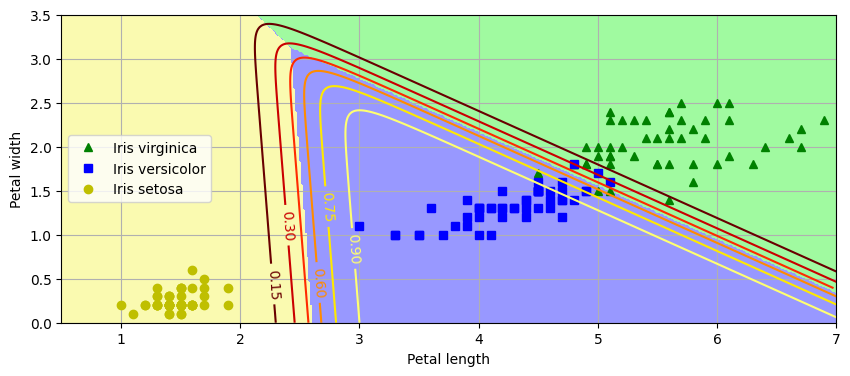

In [162]:
# Graph taken from book
from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])

x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
                     np.linspace(0, 3.5, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Iris versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Iris setosa")

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap="hot")
plt.clabel(contour, inline=1)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="center left")
plt.axis([0.5, 7, 0, 3.5])
plt.grid()
plt.show()

